In [1]:
import numpy as np
import pandas as pd 

df = pd.read_csv('seattle_collision_data_2005_2019.csv')
df.head()

##is there a relationship between number of accidents and time of year
##amount of preciptation according to fatalitiy rates 
##

,Unnamed: 0,longitude,latitude,SEVERITYCODE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,...,response_type,response_time,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WSF5
0,1,-122.324322,47.613755,0,Parked Car,2,0,0,2,0,...,NaN,NaN,9.4,0.0,NaN,NaN,33.0,38,27,17.0
1,2,-122.321556,47.571558,0,Rear Ended,3,0,0,3,0,...,NaN,NaN,9.4,0.0,NaN,NaN,33.0,38,27,17.0
2,3,-122.344164,47.555769,1,Head On,2,0,0,2,1,...,NaN,NaN,9.4,0.0,NaN,NaN,33.0,38,27,17.0
3,4,-122.309400,47.608484,1,Rear Ended,2,0,0,2,1,...,Motor Vehicle Accident,36.0,9.4,0.0,NaN,NaN,33.0,38,27,17.0
4,5,-122.319746,47.674521,0,Left Turn,2,0,0,2,0,...,NaN,NaN,9.4,0.0,NaN,NaN,33.0,38,27,17.0


In [2]:
print(df.dtypes)
print('===========')
print(df.info())

Unnamed: 0                int64
longitude               float64
latitude                float64
SEVERITYCODE              int64
COLLISIONTYPE            object
PERSONCOUNT               int64
PEDCOUNT                  int64
PEDCYLCOUNT               int64
VEHCOUNT                  int64
INJURIES                  int64
SERIOUSINJURIES           int64
FATALITIES                int64
JUNCTIONTYPE             object
INATTENTIONIND             bool
UNDERINFL                  bool
WEATHER                  object
ROADCOND                 object
LIGHTCOND                 int64
SPEEDING                   bool
HITPARKEDCAR               bool
SPDCASENO                object
DATE                     object
TIME                    float64
intersection_related       bool
response_type            object
response_time           float64
AWND                    float64
PRCP                    float64
SNOW                    float64
SNWD                    float64
TAVG                    float64
TMAX    

In [3]:
## !! we need to impute the data for missing values !!
## she showed them in class

In [4]:
# 1. Remove attributes that just arent useful for us
for col in ['WSF5','TMIN','TMAX', 'SNOW', 'SNWD', 'response_type', 'response_time']:
    if col in df:
        del df[col]
        
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111882 entries, 0 to 111881
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            111882 non-null  int64  
 1   longitude             111882 non-null  float64
 2   latitude              111882 non-null  float64
 3   SEVERITYCODE          111882 non-null  int64  
 4   COLLISIONTYPE         111882 non-null  object 
 5   PERSONCOUNT           111882 non-null  int64  
 6   PEDCOUNT              111882 non-null  int64  
 7   PEDCYLCOUNT           111882 non-null  int64  
 8   VEHCOUNT              111882 non-null  int64  
 9   INJURIES              111882 non-null  int64  
 10  SERIOUSINJURIES       111882 non-null  int64  
 11  FATALITIES            111882 non-null  int64  
 12  JUNCTIONTYPE          111882 non-null  object 
 13  INATTENTIONIND        111882 non-null  bool   
 14  UNDERINFL             111882 non-null  bool   
 15  

In [5]:
df['UNDERINFL'] = df['UNDERINFL'].astype(int)
df['SPEEDING'] = df['SPEEDING'].astype(int)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111882 entries, 0 to 111881
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            111882 non-null  int64  
 1   longitude             111882 non-null  float64
 2   latitude              111882 non-null  float64
 3   SEVERITYCODE          111882 non-null  int64  
 4   COLLISIONTYPE         111882 non-null  object 
 5   PERSONCOUNT           111882 non-null  int64  
 6   PEDCOUNT              111882 non-null  int64  
 7   PEDCYLCOUNT           111882 non-null  int64  
 8   VEHCOUNT              111882 non-null  int64  
 9   INJURIES              111882 non-null  int64  
 10  SERIOUSINJURIES       111882 non-null  int64  
 11  FATALITIES            111882 non-null  int64  
 12  JUNCTIONTYPE          111882 non-null  object 
 13  INATTENTIONIND        111882 non-null  bool   
 14  UNDERINFL             111882 non-null  int64  
 15  

,Unnamed: 0,longitude,latitude,SEVERITYCODE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,...,LIGHTCOND,SPEEDING,HITPARKEDCAR,SPDCASENO,DATE,TIME,intersection_related,AWND,PRCP,TAVG
0,1,-122.324322,47.613755,0,Parked Car,2,0,0,2,0,...,1,0,False,05 012860,2005-01-10,2.483333,False,9.4,0.0,33.0
1,2,-122.321556,47.571558,0,Rear Ended,3,0,0,3,0,...,1,0,False,05 13026,2005-01-10,7.000000,False,9.4,0.0,33.0
2,3,-122.344164,47.555769,1,Head On,2,0,0,2,1,...,3,0,False,05-013056,2005-01-10,7.900000,True,9.4,0.0,33.0
3,4,-122.309400,47.608484,1,Rear Ended,2,0,0,2,1,...,3,0,False,5013228,2005-01-10,10.633333,True,9.4,0.0,33.0
4,5,-122.319746,47.674521,0,Left Turn,2,0,0,2,0,...,3,0,False,50013235,2005-01-10,10.683333,True,9.4,0.0,33.0


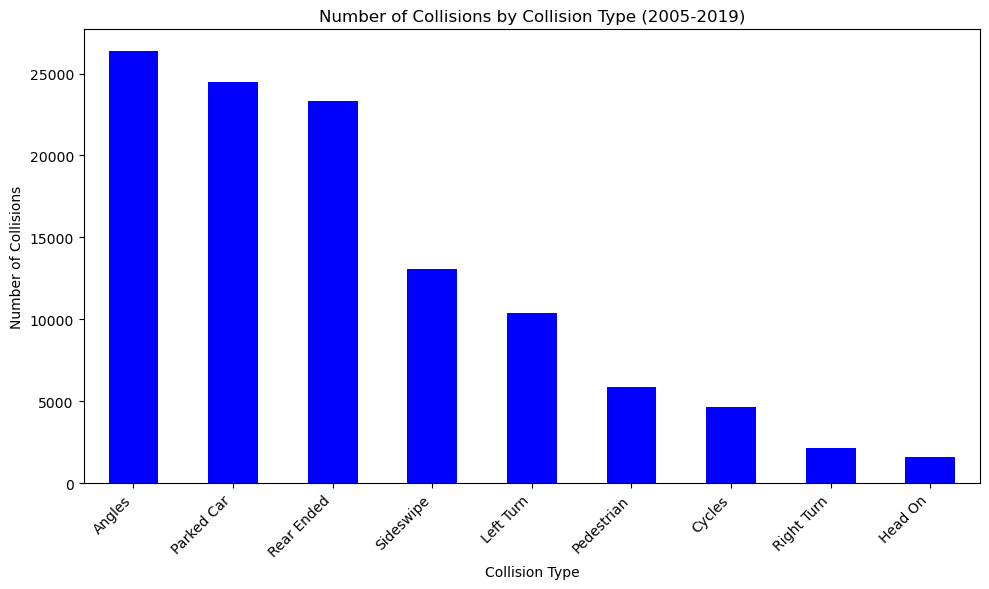

In [6]:
import matplotlib.pyplot as plt


# Count the occurrences of each collision type
collision_type_counts = df['COLLISIONTYPE'].value_counts()

# Create the bar graph
plt.figure(figsize=(10, 6))
collision_type_counts.plot(kind='bar', color='blue')
plt.title('Number of Collisions by Collision Type (2005-2019)')
plt.xlabel('Collision Type')
plt.ylabel('Number of Collisions')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout() 

# Show the plot
plt.show()


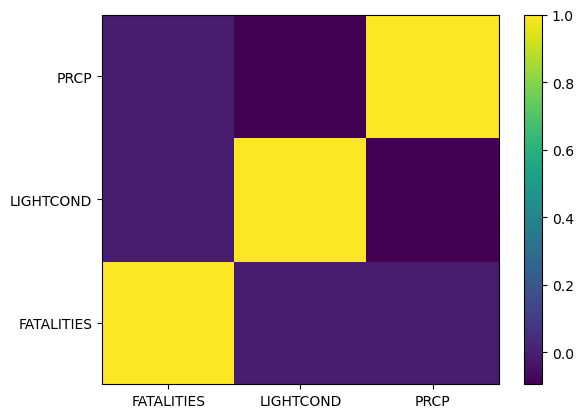

In [7]:
# plot the correlation matrix 
vars_to_use = ['FATALITIES', 'LIGHTCOND', 'PRCP'] # pick vars
plt.pcolor(df[vars_to_use].corr()) # do the feature correlation plot

# fill in the indices
plt.yticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use)
plt.xticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use)
plt.colorbar()
plt.show()

In [8]:
import folium


fatal_accidents = df[df['FATALITIES'] > 0]

# Assuming 'latitude' and 'longitude' are the column names for latitude and longitude data
# and ensuring these columns don't contain missing values
fatal_accidents = fatal_accidents.dropna(subset=['latitude', 'longitude'])

# Create a map centered around an average location of the fatal accidents
map_center = [fatal_accidents['latitude'].mean(), fatal_accidents['longitude'].mean()]
fatal_accident_map = folium.Map(location=map_center, zoom_start=12)

# Add fatal accident locations to the map
for idx, row in fatal_accidents.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3,  # Increased radius for better visibility
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7
    ).add_to(fatal_accident_map)

# Display the map
fatal_accident_map

## show line graph of all the latitude and longitudes m

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

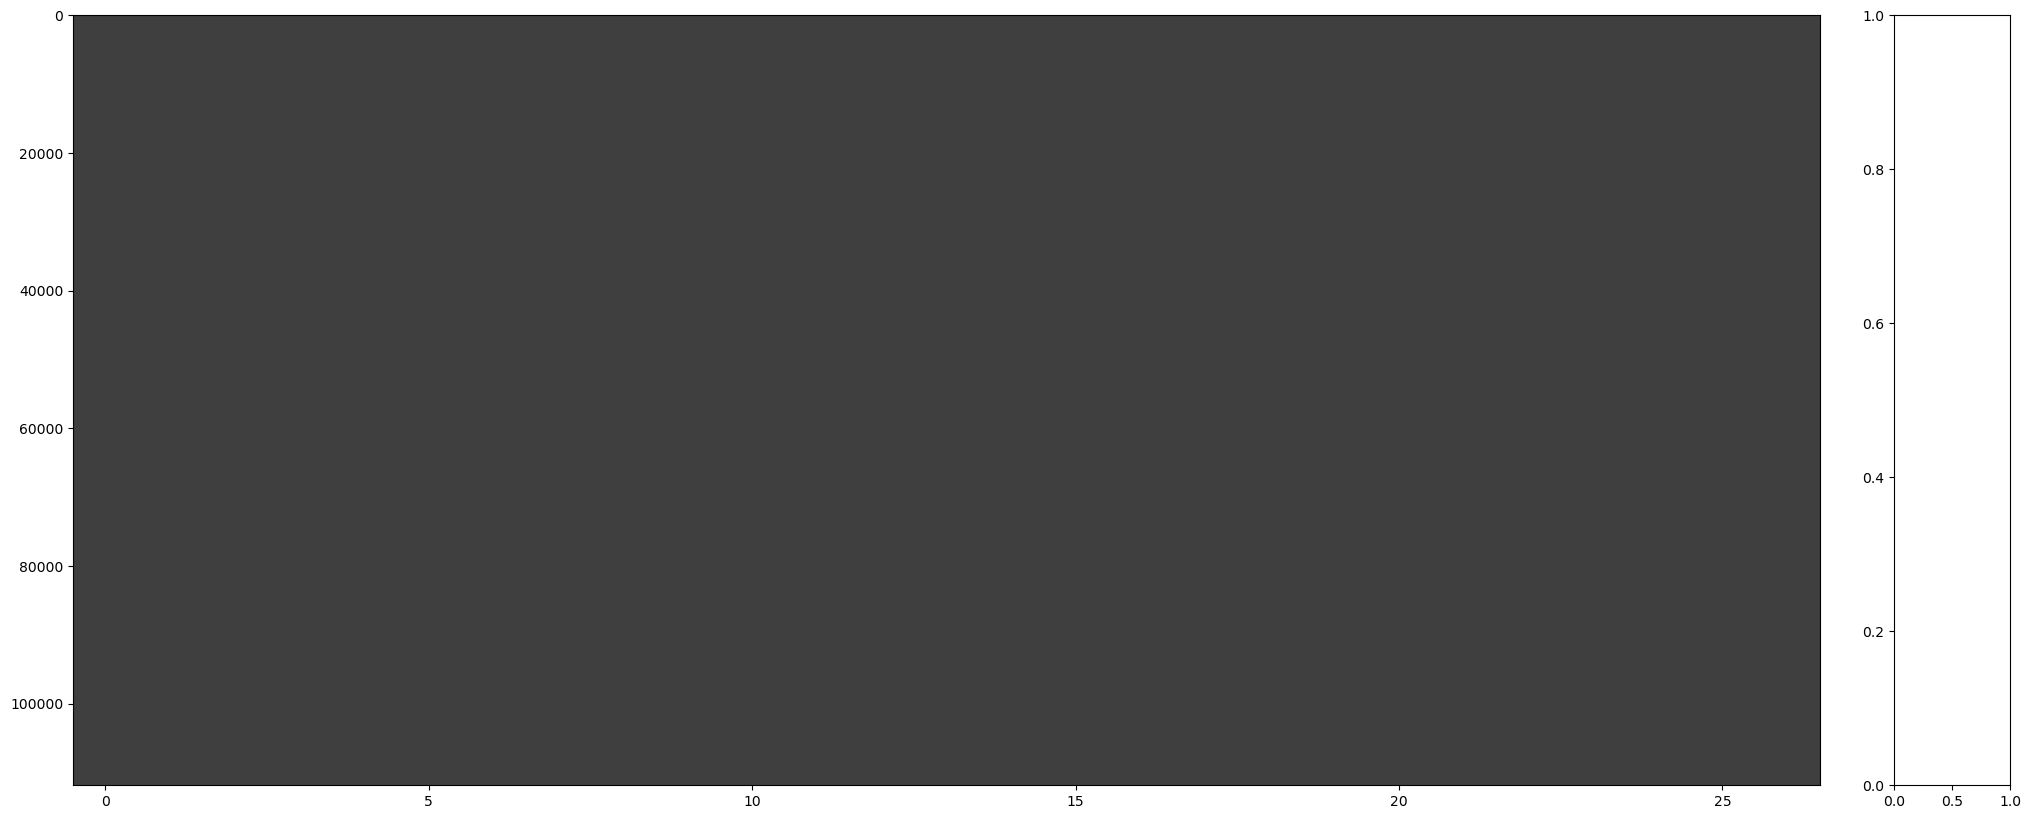

In [9]:
# this python magics will allow plot to be embedded into the notebook
import matplotlib
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

# External package: conda install missingno 
import missingno as mn

mn.matrix(df)
plt.title("Not Sorted",fontsize=22)

plt.figure()
#mn.matrix(df.sort_values(by=["Cabin","Age"]))
#plt.title("Sorted",fontsize=22)
plt.show()

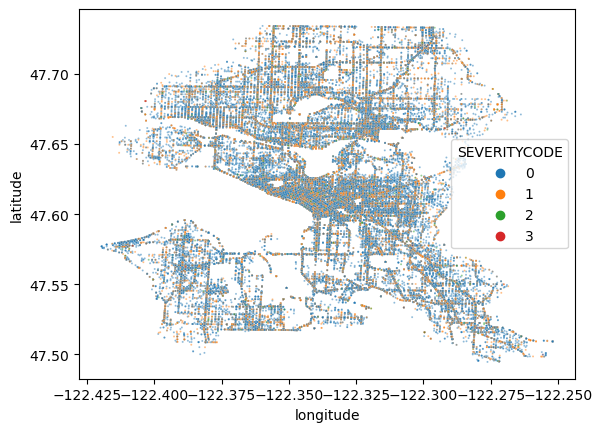

In [10]:
## Basic mapping
import polars as pl
import seaborn as sns
import statsmodels.formula.api as sm

data = pl.read_csv("seattle_collision_data_2005_2019.csv",
                   infer_schema_length = 0, null_values = ["NA"])

data = data.with_columns(pl.col("longitude").cast(float),
                         pl.col("latitude").cast(float),
                         pl.col("SEVERITYCODE").cast(str))

sns.scatterplot(data.to_pandas(), 
               x = "longitude",
               y = "latitude",
               hue = "SEVERITYCODE",
               alpha = 0.5,
               s = 2)

plt.show()

## show line graph of all the latitude and longitudes m 
##show the concentration of longititude and latitude 

In [11]:
###Correlation between road condition and weather


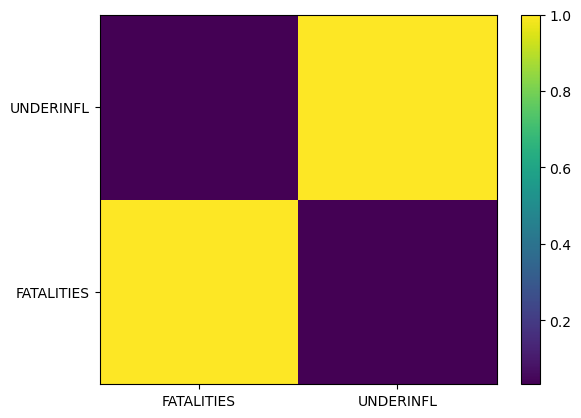

In [12]:
vars_to_use = ['FATALITIES', 'UNDERINFL'] # pick vars
plt.pcolor(df[vars_to_use].corr()) # do the feature correlation plot

# fill in the indices
plt.yticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use)
plt.xticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use)
plt.colorbar()
plt.show()

In [13]:
# lets make a pretty plot of the scatter matrix

#df[['UNDERINFL','TAVG','PRCP']] += np.random.rand(len(df),3)/2 
#sb.pairplot(df, hue="FATALITIES", height=2,
#           plot_kws=dict(s=20, alpha=0.15, linewidth=0))
#plt.show()

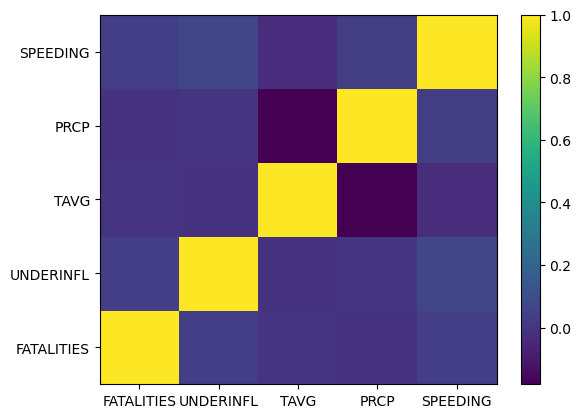

In [14]:
# plot the correlation matrix 
vars_to_use = ['FATALITIES', 'UNDERINFL', 'TAVG', 'PRCP', 'SPEEDING'] # pick vars
plt.pcolor(df[vars_to_use].corr()) # do the feature correlation plot

# fill in the indices
plt.yticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use)
plt.xticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use)
plt.colorbar()
plt.show()

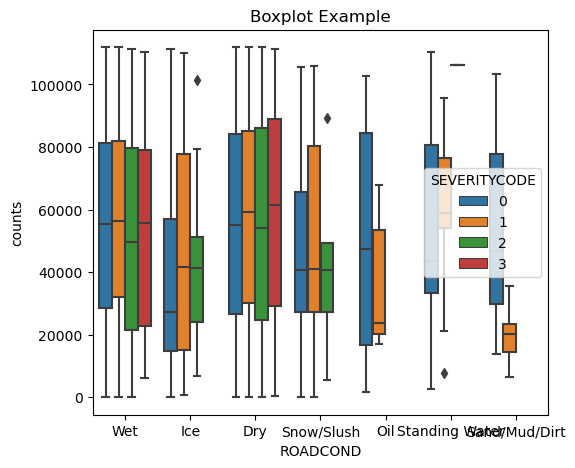

In [15]:
# sns boxplot
plt.subplots(figsize=(20, 5))

w_counts = pd.read_csv('with_count.csv')

plt.subplot(1,3,1)
sns.boxplot(x="ROADCOND", y="counts", hue="SEVERITYCODE", data=w_counts)
plt.title('Boxplot Example')

#plt.subplot(1,3,2)
#sns.violinplot(x="Sex", y="Age", hue="Survived", data=df)
#plt.title('Violin Example')

#plt.subplot(1,3,3)
#sns.swarmplot(x="Sex", y="Age", hue="Survived", data=df, s=3) # s controls marker size (like bins or bw)
#plt.title('Swarm Example')

plt.show()

In [ ]:
import pandas as pd